## Aufgabe

In der Datei `iris.csv` befindet sich ein Datensatz, für drei unterschiedliche Spezies der Gattung Schwertlilie (_Iris_). Für einzelne Pflanzen wurden jeweils Länge und Breite des Kelch- und Kronenblattes vermessen. 
Um was für eine Pflanzenart handelt es sich? Sage dazu die Spalte `Species` vorher.

Teile die Daten dazu zuerst in Trainings- und Testdaten auf. Skaliere anschließend die Daten auf ein einheitliches Maß, und vergleiche folgende Modelle:

- Logistische Regression
- K-Nearest Neighbor
- Perzeptron
- Multilayer-Perzeptron

Untersuchen Sie dabei folgende Fragestellungen:
1. Mit welchen Merkmal lassen sie die einzelnen Spezies am besten voneinander Trennen?
1. Welche Klassen lassen sich schwer voneinader separieren?
1. Welche Anzahl von Nachbarn eignen sich zur Klassifikation mittels K-Nearest Neighbor?


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from helper import plot_classifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale
from sklearn import preprocessing
df = pd.read_csv("DataSets/iris.csv")
from warnings import simplefilter
simplefilter(action='ignore')

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:

X=df[["SepalLengthCm","SepalWidthCm"]].values
Y=df[["Species"]].values
#Normieren der Species
le = preprocessing.LabelEncoder()
#le.fit(Y)
#list(le.classes_)
Y=le.fit_transform(Y)
print(Y)
#le.transform(["tokyo", "tokyo", "paris"])

#list(le.inverse_transform([2, 2, 1]))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [3]:
#Skalieren
#X=minmax_scale(X)
#Y=minmax_scale(Y)
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.25)
X_train = minmax_scale(X_train)
X_test = minmax_scale(X_test)
#Yn_train = minmax_scale(Y_train)
#Yn_test = minmax_scale(Y_test)

#from sklearn.preprocessing import StandardScaler  
#scaler = StandardScaler()  
#scaler.fit(X_train)

print(X_train)
print(Y_train)

[[0.19444444 0.125     ]
 [0.80555556 0.41666667]
 [0.22222222 0.70833333]
 [0.5        0.33333333]
 [0.41666667 0.83333333]
 [0.11111111 0.5       ]
 [0.41666667 0.29166667]
 [0.33333333 0.16666667]
 [0.22222222 0.58333333]
 [0.58333333 0.45833333]
 [0.13888889 0.58333333]
 [0.55555556 0.33333333]
 [0.30555556 0.79166667]
 [0.58333333 0.375     ]
 [0.08333333 0.45833333]
 [0.47222222 0.58333333]
 [0.02777778 0.41666667]
 [0.69444444 0.33333333]
 [0.94444444 0.41666667]
 [0.55555556 0.20833333]
 [0.55555556 0.54166667]
 [0.66666667 0.45833333]
 [0.13888889 0.41666667]
 [0.33333333 0.16666667]
 [0.69444444 0.5       ]
 [0.55555556 0.54166667]
 [0.69444444 0.41666667]
 [0.66666667 0.45833333]
 [0.16666667 0.20833333]
 [0.36111111 0.375     ]
 [0.63888889 0.41666667]
 [1.         0.75      ]
 [0.19444444 0.66666667]
 [0.66666667 0.54166667]
 [0.66666667 0.45833333]
 [0.41666667 0.29166667]
 [0.27777778 0.70833333]
 [0.5        0.41666667]
 [0.38888889 1.        ]
 [0.22222222 0.625     ]


In [4]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression


model=LogisticRegression();
model.fit(X_train,Y_train)
print("Trainingsdaten: ", model.score(X_train,Y_train))
print("Testdaten: ", model.score(X_test,Y_test))

print(model.coef_)
print(model.intercept_)
prediction = model.predict(X_test)
print("prediction:",prediction)

Trainingsdaten:  0.7767857142857143
Testdaten:  0.7105263157894737
[[-3.98660449  2.84504324]
 [ 0.11844431 -2.48148768]
 [ 3.17339166 -0.88872472]]
[-0.48638983  0.27947147 -1.56110897]
prediction: [2 2 2 0 0 2 0 2 0 2 0 2 0 0 2 0 0 2 2 0 0 1 0 0 2 2 0 1 0 2 1 0 0 2 2 2 1
 2]


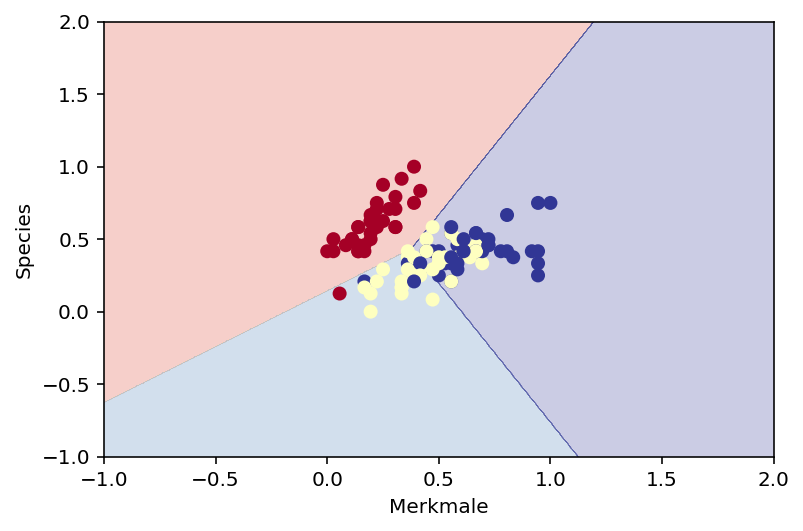

In [5]:
plot_classifier(model, X_train, Y_train, proba = False, xlabel = "Merkmale", ylabel = "Species")

In [6]:
#K-Nearest-Neighbor
#Training
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 15, 
                             weights = 'uniform',
                            metric='minkowski', p=2)
model.fit(X_train,Y_train)

print(model.score(X_test,Y_test))

0.8421052631578947


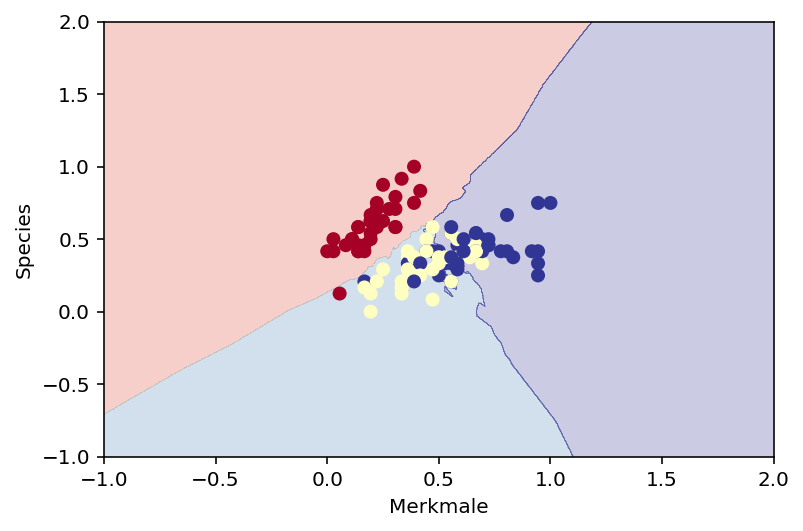

In [7]:
plot_classifier(model, X_train, Y_train, xlabel = "Merkmale", ylabel = "Species")

In [8]:
#Perzeptron
from sklearn.linear_model import Perceptron

model = Perceptron();
model.fit(X_train,Y_train)

print("Trainingsdaten: ", model.score(X_train,Y_train))
print("Testdaten: ", model.score(X_test,Y_test))

print(model.coef_)
print(model.intercept_)

Trainingsdaten:  0.6696428571428571
Testdaten:  0.6578947368421053
[[-2.69444444  1.70833333]
 [-0.77777778 -3.04166667]
 [ 5.02777778 -0.5       ]]
[ 0.  0. -2.]


In [9]:
from sklearn.model_selection import cross_val_score
import itertools
from sklearn.model_selection import KFold
y=df[["Species"]].values
parameterList = ["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]
for L in range(1, len(parameterList)+1):
    for subset in itertools.combinations(parameterList, L):
        print(subset)
        x = df[list(subset)].values
        scores = cross_val_score(LogisticRegression(),x,y,cv=KFold(n_splits=10, shuffle =True))

        print(np.mean(scores))

('SepalLengthCm',)
0.6533333333333333
('SepalWidthCm',)
0.5266666666666666
('PetalLengthCm',)
0.7666666666666666
('PetalWidthCm',)
0.8533333333333335
('SepalLengthCm', 'SepalWidthCm')
0.76
('SepalLengthCm', 'PetalLengthCm')
0.9133333333333334
('SepalLengthCm', 'PetalWidthCm')
0.9066666666666666
('SepalWidthCm', 'PetalLengthCm')
0.9200000000000002
('SepalWidthCm', 'PetalWidthCm')
0.9133333333333333
('PetalLengthCm', 'PetalWidthCm')
0.8533333333333333
('SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm')
0.9266666666666665
('SepalLengthCm', 'SepalWidthCm', 'PetalWidthCm')
0.9
('SepalLengthCm', 'PetalLengthCm', 'PetalWidthCm')
0.9400000000000001
('SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm')
0.9466666666666667
('SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm')
0.9333333333333333


In [10]:
from sklearn.model_selection import cross_val_score
import itertools
from sklearn.model_selection import KFold
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                y=df[["Species"]].values
parameterList = ["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]
for L in range(1, len(parameterList)+1):
    for subset in itertools.combinations(parameterList, L):
        print(subset)
        x = df[list(subset)].values
        scores = cross_val_score(LogisticRegression(),x,y,cv=KFold(n_splits=10, shuffle =True))

        print(np.mean(scores))

('SepalLengthCm',)
0.6533333333333333
('SepalWidthCm',)
0.49333333333333335
('PetalLengthCm',)
0.7666666666666666
('PetalWidthCm',)
0.8333333333333334
('SepalLengthCm', 'SepalWidthCm')
0.76
('SepalLengthCm', 'PetalLengthCm')
0.9200000000000002
('SepalLengthCm', 'PetalWidthCm')
0.8733333333333334
('SepalWidthCm', 'PetalLengthCm')
0.8866666666666667
('SepalWidthCm', 'PetalWidthCm')
0.9400000000000001
('PetalLengthCm', 'PetalWidthCm')
0.8733333333333334
('SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm')
0.9266666666666667
('SepalLengthCm', 'SepalWidthCm', 'PetalWidthCm')
0.9000000000000001
('SepalLengthCm', 'PetalLengthCm', 'PetalWidthCm')
0.9400000000000001
('SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm')
0.9600000000000002
('SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm')
0.9466666666666667


In [11]:
from sklearn.neural_network import MLPClassifier  
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)  
mlp.fit(X_train, Y_train)  
print("Trainingsdaten: ",mlp.score(X_train,Y_train))
print("Testdaten: ",mlp.score(X_test,Y_test))

Trainingsdaten:  0.8125
Testdaten:  0.7894736842105263


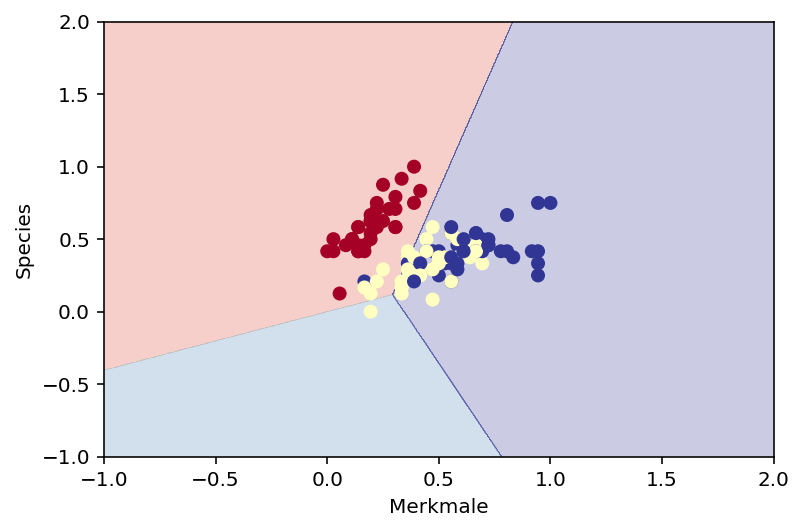

In [12]:
plot_classifier(model, X_train, Y_train, xlabel = "Merkmale", ylabel = "Species")

In [13]:
from sklearn.model_selection import cross_val_score
import itertools
from sklearn.model_selection import KFold
y=df[["Species"]].values.ravel()
parameterList = ["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]
for L in range(1, len(parameterList)+1):
    for subset in itertools.combinations(parameterList, L):
        print(subset)
        x = df[list(subset)].values
        scores = cross_val_score(MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)  ,x,y,cv=KFold(n_splits=10, shuffle =True))

        print(np.mean(scores))

('SepalLengthCm',)
0.7066666666666667
('SepalWidthCm',)
0.52
('PetalLengthCm',)
0.9533333333333334
('PetalWidthCm',)
0.96
('SepalLengthCm', 'SepalWidthCm')
0.7733333333333333
('SepalLengthCm', 'PetalLengthCm')
0.9
('SepalLengthCm', 'PetalWidthCm')
0.9466666666666667
('SepalWidthCm', 'PetalLengthCm')
0.9333333333333333
('SepalWidthCm', 'PetalWidthCm')
0.9400000000000001
('PetalLengthCm', 'PetalWidthCm')
0.9533333333333334
('SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm')
0.96
('SepalLengthCm', 'SepalWidthCm', 'PetalWidthCm')
0.9466666666666667
('SepalLengthCm', 'PetalLengthCm', 'PetalWidthCm')
0.9466666666666667
('SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm')
0.9666666666666666
('SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm')
0.9066666666666666
